# Project 3 Fraud Detection Algorithm

## Load data and data split

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

data = pd.read_csv("vars_final_zscale.csv", index_col = 0)

In [2]:
# Look at the data
data.head()

,Fraud,Card_Amount_Act_median_30D,Card_Merch_Amount_max_7D,v_num_card_amount_card14,v_num_card_amount_card7,v_num_merch_amount_card7,v_num_merch_amount_merch14,Card_Merch_Amount_max_30D,Card_State_Amount_max_30D,Card_State_Amount_max_14D,...,Card_Zip_Amount_total_3D,Card_Zip_Amount_max_3D,Card_Zip_Amount_median_3D,Card_Zip_Amount_mean_3D,Card_Amount_median_14D,Card_Merch_Amount_median_7D,Card_State_Amount_mean_30D,Card_State_Amount_mean_14D,v_amount_card_num_card7,Card_Merch_Amount_mean_14D
Recnum,,,,,,,,,,,,,,,,,,,,,
1,0,-0.120119,-0.158959,5.871008,4.898253,0.501112,5.898894,-0.175484,-0.231773,-0.203669,...,-0.127423,-0.156257,-0.188153,-0.188405,-0.245421,-0.188017,-0.194931,-0.196986,-0.472119,-0.187477
2,0,-0.120119,-0.160996,0.518050,0.338047,-0.096451,0.551609,-0.177512,-0.233739,-0.205665,...,-0.128918,-0.158296,-0.190803,-0.191053,-0.248927,-0.190735,-0.197738,-0.199734,-0.411548,-0.190208
3,0,-0.120119,-0.125551,-0.057104,-0.151928,-0.115540,-0.070261,-0.142209,-0.199517,-0.170932,...,-0.102904,-0.122819,-0.144685,-0.144963,-0.187902,-0.143425,-0.148884,-0.151906,-0.091059,-0.142679
4,0,-0.120119,-0.162273,5.697684,4.750597,0.827875,5.898894,-0.178785,-0.234972,-0.206917,...,-0.129855,-0.159574,-0.192465,-0.192714,-0.251127,-0.192440,-0.199498,-0.201458,-0.471886,-0.191920
5,0,-0.120119,-0.158959,5.871008,4.898253,0.501112,5.898894,-0.175484,-0.231773,-0.203669,...,-0.127423,-0.156257,-0.188153,-0.188405,-0.245421,-0.188017,-0.194931,-0.196986,-0.472119,-0.187477


In [3]:
# test for NAN
pd.isnull(data).any()

Fraud                          False
Card_Amount_Act_median_30D     False
Card_Merch_Amount_max_7D       False
v_num_card_amount_card14       False
v_num_card_amount_card7        False
v_num_merch_amount_card7       False
v_num_merch_amount_merch14     False
Card_Merch_Amount_max_30D      False
Card_State_Amount_max_30D      False
Card_State_Amount_max_14D      False
Card_Amount_mean_30D           False
Card_Zip_Amount_total_3D       False
Card_Zip_Amount_max_3D         False
Card_Zip_Amount_median_3D      False
Card_Zip_Amount_mean_3D        False
Card_Amount_median_14D         False
Card_Merch_Amount_median_7D    False
Card_State_Amount_mean_30D     False
Card_State_Amount_mean_14D     False
v_amount_card_num_card7        False
Card_Merch_Amount_mean_14D     False
dtype: bool

In [3]:
# split data into out of date(after 11/1/10), train and test
oot_df = data.iloc[84300:,:]
trte_df = data.iloc[:84299,:]

In [4]:
train, test = train_test_split(trte_df, test_size=0.2, random_state=0)

In [5]:
oot_df.to_csv('oot.csv',index=True)
train.to_csv('train.csv',index=True)
test.to_csv('test.csv',index=True)

In [54]:
train.head()

,Fraud,Card_Amount_Act_median_30D,Card_Merch_Amount_max_7D,v_num_card_amount_card14,v_num_card_amount_card7,v_num_merch_amount_card7,v_num_merch_amount_merch14,Card_Merch_Amount_max_30D,Card_State_Amount_max_30D,Card_State_Amount_max_14D,...,Card_Zip_Amount_total_3D,Card_Zip_Amount_max_3D,Card_Zip_Amount_median_3D,Card_Zip_Amount_mean_3D,Card_Amount_median_14D,Card_Merch_Amount_median_7D,Card_State_Amount_mean_30D,Card_State_Amount_mean_14D,v_amount_card_num_card7,Card_Merch_Amount_mean_14D
Recnum,,,,,,,,,,,,,,,,,,,,,
61285,0,-0.042729,0.329705,-0.175753,-0.248781,-0.119465,-0.191647,0.311229,0.240022,0.275170,...,0.231208,0.332842,0.447649,0.447009,0.063996,0.464213,0.156768,0.462389,0.327241,0.467770
20776,0,-0.120119,-0.144467,0.301409,0.153490,-0.103641,-0.039867,0.028589,-0.033955,-0.189469,...,-0.116788,-0.141753,-0.169298,-0.169561,-0.157989,-0.168674,-0.043746,-0.177432,-0.433885,-0.168045
57697,0,-0.149679,-0.062861,-0.171344,-0.245763,-0.118773,-0.195958,-0.079769,-0.138992,-0.109503,...,-0.122748,-0.149882,-0.179865,-0.180122,-0.172338,-0.132645,-0.128795,-0.132239,-0.451122,-0.123135
7284,0,0.035387,-0.152903,-0.098997,-0.187617,-0.118274,0.161706,-0.169452,-0.225925,-0.197734,...,-0.122978,-0.150195,-0.180273,-0.180529,-0.177545,-0.179933,-0.186583,-0.188814,-0.307728,-0.179356
83938,0,-0.120119,-0.067115,-0.161152,-0.200819,-0.118531,-0.146784,-0.084006,0.145217,0.178949,...,-0.060019,-0.064331,-0.068654,-0.068979,0.000879,-0.065430,0.137450,0.128417,-0.019888,-0.064323


In [55]:
train.describe()

,Fraud,Card_Amount_Act_median_30D,Card_Merch_Amount_max_7D,v_num_card_amount_card14,v_num_card_amount_card7,v_num_merch_amount_card7,v_num_merch_amount_merch14,Card_Merch_Amount_max_30D,Card_State_Amount_max_30D,Card_State_Amount_max_14D,...,Card_Zip_Amount_total_3D,Card_Zip_Amount_max_3D,Card_Zip_Amount_median_3D,Card_Zip_Amount_mean_3D,Card_Amount_median_14D,Card_Merch_Amount_median_7D,Card_State_Amount_mean_30D,Card_State_Amount_mean_14D,v_amount_card_num_card7,Card_Merch_Amount_mean_14D
count,67439.000000,67439.000000,67439.000000,67439.000000,67439.000000,67439.000000,67439.000000,67439.000000,67439.000000,67439.000000,...,67439.000000,67439.000000,67439.000000,67439.000000,67439.000000,67439.000000,67439.000000,67439.000000,67439.000000,67439.000000
mean,0.010350,0.006837,0.000119,0.007408,0.009245,0.013316,-0.003163,0.000451,0.000740,0.000160,...,0.000492,0.000095,-0.000439,-0.000479,0.004815,-0.000851,0.000967,0.000541,-0.000338,0.000264
std,0.101208,1.097416,1.040219,0.830678,0.885574,1.071959,0.889737,1.039649,1.035745,1.037151,...,1.044059,1.040415,1.033109,1.032900,1.052365,1.033052,1.036631,1.033606,1.029082,1.034116
min,0.000000,-0.160211,-0.168566,-0.179910,-0.256505,-0.119615,-0.202937,-0.185052,-0.241048,-0.213083,...,-0.134474,-0.165873,-0.200653,-0.200896,-0.261894,-0.200839,-0.208172,-0.209949,-0.479974,-0.200358
25%,0.000000,-0.133872,-0.153160,-0.170082,-0.242393,-0.119118,-0.188243,-0.165869,-0.211664,-0.190080,...,-0.123077,-0.151136,-0.183425,-0.183496,-0.218166,-0.184357,-0.181783,-0.186951,-0.433885,-0.182628
50%,0.000000,-0.117090,-0.120983,-0.156514,-0.221692,-0.117963,-0.160467,-0.126377,-0.149270,-0.141574,...,-0.099365,-0.119938,-0.143772,-0.143863,-0.143084,-0.143753,-0.123511,-0.135230,-0.302793,-0.140591
75%,0.000000,-0.058265,-0.026372,-0.105634,-0.136278,-0.110833,-0.076981,-0.017261,0.019098,-0.003191,...,-0.028879,-0.028135,-0.028500,-0.028685,0.001887,-0.025947,0.002418,-0.006035,0.032521,-0.021002
max,1.000000,172.276381,52.243400,128.832259,109.649404,51.448014,139.288013,52.017693,50.361630,51.145151,...,54.102343,52.292759,47.876426,47.846760,29.176163,49.118417,50.720573,49.649640,55.088561,49.346992


In [56]:
sum(train['Fraud'])
sum(train['Fraud'])/len(train['Fraud'])

0.010350094159166061

In [57]:
test.head()

,Fraud,Card_Amount_Act_median_30D,Card_Merch_Amount_max_7D,v_num_card_amount_card14,v_num_card_amount_card7,v_num_merch_amount_card7,v_num_merch_amount_merch14,Card_Merch_Amount_max_30D,Card_State_Amount_max_30D,Card_State_Amount_max_14D,...,Card_Zip_Amount_total_3D,Card_Zip_Amount_max_3D,Card_Zip_Amount_median_3D,Card_Zip_Amount_mean_3D,Card_Amount_median_14D,Card_Merch_Amount_median_7D,Card_State_Amount_mean_30D,Card_State_Amount_mean_14D,v_amount_card_num_card7,Card_Merch_Amount_mean_14D
Recnum,,,,,,,,,,,,,,,,,,,,,
52846,0,-0.079432,-0.082046,-0.150362,-0.220624,-0.118216,-0.137063,-0.098877,-0.157514,-0.128302,...,-0.070976,-0.079275,-0.088081,-0.088393,-0.170159,-0.085358,-0.088922,-0.093203,-0.088858,-0.084344
79652,0,-0.120119,-0.059150,-0.131671,-0.215452,-0.105188,-0.196731,-0.076073,-0.135409,-0.105866,...,-0.054173,-0.056359,-0.058290,-0.058621,-0.073582,-0.054798,-0.057365,-0.062309,0.509321,-0.053642
61111,0,-0.103954,0.045184,-0.155251,-0.235540,-0.117976,-0.159359,0.027845,-0.034677,-0.003630,...,0.022398,0.048068,0.077458,0.077045,0.106046,0.084458,0.086435,0.078473,1.452679,0.086258
71644,0,-0.120177,-0.001548,-0.112437,-0.154667,-0.115646,-0.103516,-0.018701,-0.079795,-0.049423,...,-0.011899,0.001294,0.016655,0.016279,0.025589,0.022084,0.022026,0.015416,-0.312222,0.023595
82706,0,-0.120119,-0.115551,-0.080279,-0.171672,-0.116309,-0.095318,-0.132249,-0.189863,-0.161134,...,-0.095566,-0.112810,-0.131674,-0.131960,-0.170686,-0.130078,-0.135102,-0.138413,-0.000646,-0.129271


In [58]:
test.describe()

,Fraud,Card_Amount_Act_median_30D,Card_Merch_Amount_max_7D,v_num_card_amount_card14,v_num_card_amount_card7,v_num_merch_amount_card7,v_num_merch_amount_merch14,Card_Merch_Amount_max_30D,Card_State_Amount_max_30D,Card_State_Amount_max_14D,...,Card_Zip_Amount_total_3D,Card_Zip_Amount_max_3D,Card_Zip_Amount_median_3D,Card_Zip_Amount_mean_3D,Card_Amount_median_14D,Card_Merch_Amount_median_7D,Card_State_Amount_mean_30D,Card_State_Amount_mean_14D,v_amount_card_num_card7,Card_Merch_Amount_mean_14D
count,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,...,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000
mean,0.010795,0.011238,0.008993,0.013380,0.012578,0.009646,0.005798,0.008957,0.007501,0.007038,...,0.006999,0.007690,0.006831,0.007031,0.005956,0.006148,0.005978,0.005832,0.004209,0.006677
std,0.103339,0.925062,1.124757,1.684186,1.529370,1.022207,1.393149,1.124042,1.122173,1.121671,...,1.120069,1.123608,1.117014,1.117906,1.073830,1.112527,1.119071,1.115670,0.952077,1.112942
min,0.000000,-0.160168,-0.168535,-0.179909,-0.256546,-0.119615,-0.202794,-0.185014,-0.241011,-0.213052,...,-0.134451,-0.165841,-0.200612,-0.200856,-0.261907,-0.200797,-0.208119,-0.209907,-0.479906,-0.200316
25%,0.000000,-0.133157,-0.152816,-0.169880,-0.242377,-0.119117,-0.188596,-0.165405,-0.211154,-0.189844,...,-0.123021,-0.151134,-0.183138,-0.183166,-0.217404,-0.183860,-0.181367,-0.186473,-0.433783,-0.182372
50%,0.000000,-0.116295,-0.120366,-0.156063,-0.221346,-0.117994,-0.161342,-0.125283,-0.149137,-0.140114,...,-0.099100,-0.119022,-0.142560,-0.142620,-0.141277,-0.142605,-0.123310,-0.134522,-0.295366,-0.139315
75%,0.000000,-0.058470,-0.023973,-0.106447,-0.140520,-0.111127,-0.073229,-0.017021,0.016468,-0.002674,...,-0.028702,-0.027170,-0.026869,-0.026969,0.000901,-0.023158,0.000961,-0.006088,0.042869,-0.018103
max,1.000000,28.975467,52.243400,156.477738,133.200692,35.269847,139.288013,52.017693,50.361630,51.145151,...,54.102343,52.292759,47.876426,47.846760,29.176163,49.118417,50.720573,49.649640,22.270412,49.346992


In [59]:
sum(test['Fraud'])
sum(test['Fraud'])/len(test['Fraud'])

0.010794780545670225

## Build algorithm

In [6]:
# split lables and features
train_lab = train["Fraud"]
train_fea = train.iloc[:,1:]

train_fea.head()

,Card_Amount_Act_median_30D,Card_Merch_Amount_max_7D,v_num_card_amount_card14,v_num_card_amount_card7,v_num_merch_amount_card7,v_num_merch_amount_merch14,Card_Merch_Amount_max_30D,Card_State_Amount_max_30D,Card_State_Amount_max_14D,Card_Amount_mean_30D,Card_Zip_Amount_total_3D,Card_Zip_Amount_max_3D,Card_Zip_Amount_median_3D,Card_Zip_Amount_mean_3D,Card_Amount_median_14D,Card_Merch_Amount_median_7D,Card_State_Amount_mean_30D,Card_State_Amount_mean_14D,v_amount_card_num_card7,Card_Merch_Amount_mean_14D
Recnum,,,,,,,,,,,,,,,,,,,,
47152,0.134537,-0.024034,-0.163762,-0.239841,-0.118964,-0.200408,-0.041098,-0.101505,-0.071457,-0.341606,-0.028402,-0.021212,-0.012602,-0.012961,-0.222213,-0.007929,-0.142846,-0.118167,-0.044403,-0.006557
74500,-0.116442,0.212952,-0.174148,-0.249107,-0.119520,-0.188137,0.194943,0.320759,0.191221,0.861028,0.145523,0.215985,0.295742,0.295194,0.294790,0.308381,0.116784,0.056680,0.010545,0.311216
69232,-0.152066,-0.157243,-0.131525,-0.213607,-0.106216,-0.182392,-0.129652,-0.187345,-0.201988,-0.204853,-0.126164,-0.154540,-0.185921,-0.186173,-0.242467,-0.185726,-0.162037,-0.194671,-0.445885,-0.185176
21726,-0.120119,-0.135974,-0.090550,-0.180422,-0.106261,-0.147378,-0.152591,-0.209581,-0.181146,-0.286515,-0.096468,-0.133252,-0.187843,-0.178453,-0.206093,-0.187698,-0.184382,-0.186659,-0.439954,-0.177214
5655,-0.106726,-0.104640,-0.172669,-0.250379,-0.119496,-0.192307,-0.059761,-0.119597,-0.150442,0.183705,-0.087558,-0.101890,-0.117479,-0.117773,0.447488,-0.115516,-0.077429,-0.123691,-0.024473,-0.114641


In [7]:
test_lab = test["Fraud"]
test_fea = test.iloc[:,1:]

test_fea.head()

,Card_Amount_Act_median_30D,Card_Merch_Amount_max_7D,v_num_card_amount_card14,v_num_card_amount_card7,v_num_merch_amount_card7,v_num_merch_amount_merch14,Card_Merch_Amount_max_30D,Card_State_Amount_max_30D,Card_State_Amount_max_14D,Card_Amount_mean_30D,Card_Zip_Amount_total_3D,Card_Zip_Amount_max_3D,Card_Zip_Amount_median_3D,Card_Zip_Amount_mean_3D,Card_Amount_median_14D,Card_Merch_Amount_median_7D,Card_State_Amount_mean_30D,Card_State_Amount_mean_14D,v_amount_card_num_card7,Card_Merch_Amount_mean_14D
Recnum,,,,,,,,,,,,,,,,,,,,
40396,-0.120119,-0.014037,-0.168169,-0.167116,-0.111773,-0.158701,-0.031140,0.336954,0.373550,0.253024,-0.021065,-0.011206,0.000406,0.000039,-0.004702,0.005414,0.104099,0.223235,-0.148707,0.006849
64454,-0.120119,-0.157617,-0.157747,-0.209001,-0.118381,-0.176305,-0.171055,-0.078143,-0.047746,-0.061483,-0.126438,-0.154914,-0.186407,-0.186659,0.028535,-0.186225,-0.119166,-0.088725,-0.219978,-0.185677
40417,-0.121891,-0.009501,-0.174548,-0.245831,-0.119408,-0.191619,0.151614,0.398138,0.435647,0.100108,0.294455,0.259888,0.179560,0.179084,0.338881,0.011468,0.032083,0.224872,-0.165835,0.132907
40880,-0.087993,-0.027095,-0.131933,-0.215676,-0.086928,-0.167446,-0.044146,-0.104461,-0.074456,-0.246956,-0.030648,-0.024276,-0.016584,-0.016941,-0.072555,-0.012015,-0.013185,-0.019056,-0.053628,-0.010661
37038,-0.110350,-0.090700,-0.156955,-0.198778,-0.112859,-0.194323,-0.107497,-0.165870,-0.136783,-0.254985,-0.077328,-0.087938,-0.099341,-0.099647,-0.064341,-0.096910,-0.100851,-0.104881,0.224047,-0.095949


In [59]:
oot_lab = oot_df["Fraud"]
oot_fea = oot_df.iloc[:,1:]

oot_fea.head()

,Card_Amount_Act_median_30D,Card_Merch_Amount_max_7D,v_num_card_amount_card14,v_num_card_amount_card7,v_num_merch_amount_card7,v_num_merch_amount_merch14,Card_Merch_Amount_max_30D,Card_State_Amount_max_30D,Card_State_Amount_max_14D,Card_Amount_mean_30D,Card_Zip_Amount_total_3D,Card_Zip_Amount_max_3D,Card_Zip_Amount_median_3D,Card_Zip_Amount_mean_3D,Card_Amount_median_14D,Card_Merch_Amount_median_7D,Card_State_Amount_mean_30D,Card_State_Amount_mean_14D,v_amount_card_num_card7,Card_Merch_Amount_mean_14D
Recnum,,,,,,,,,,,,,,,,,,,,
84630,-0.133288,-0.135102,-0.165760,-0.237590,-0.119247,-0.032344,-0.151722,0.126509,-0.143693,-0.005600,-0.109914,-0.132378,-0.157112,-0.157382,-0.080455,-0.156173,-0.018733,-0.129041,-0.439999,-0.155486
84631,-0.120119,-0.158138,0.035379,-0.073142,-0.112470,0.373503,-0.174666,-0.193656,-0.164983,-0.311902,-0.098449,-0.116742,-0.136786,-0.137069,-0.177450,-0.186920,-0.140517,-0.143714,-0.258092,-0.186375
84632,0.202877,0.322298,-0.169211,-0.247433,-0.118903,-0.197509,0.303853,0.232872,0.267913,0.035164,0.225773,0.325429,0.438013,0.437378,0.583144,0.454328,0.468376,0.452396,3.958278,0.457839
84633,-0.126975,-0.120366,-0.170521,-0.248534,-0.119303,-0.084549,-0.137045,-0.194512,-0.165852,-0.041604,-0.099100,-0.117630,-0.137940,-0.138222,-0.178977,-0.136506,-0.146139,-0.144911,-0.262101,-0.135728
84634,-0.045275,-0.022658,-0.147133,-0.217820,-0.118107,-0.186504,-0.039727,-0.100177,-0.070108,-0.223806,-0.027392,-0.019835,-0.010811,-0.011171,-0.176275,-0.006092,-0.007070,-0.013069,0.134077,-0.004711


In [8]:
# import neccessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

### Trial on Logistic Regression With All the Features

In [9]:
clf = LogisticRegression()

# train the classifier and fit the model
clf.fit(train_fea, train_lab)

# model evaluation: the mean accuracy on the given test data and labels
accuracy = clf.score(train_fea, train_lab)
print("accuracy:", accuracy)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy: 0.992556236005872


# Feature Selection based on Accuracy

In [10]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    score = clf.score(features_sub, train_lab)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.9896350776257062
2 0.9912810095048858
3 0.9912513530746304
4 0.9912810095048858
5 0.9912810095048858


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6 0.9913996352259079
7 0.9913996352259079


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8 0.9914886045166743
9 0.9914886045166743


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10 0.9921410459822951


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


11 0.9922448434881893


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12 0.9922448434881893


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13 0.9920965613369119


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14 0.9920669049066564


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15 0.9920520766915286


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16 0.992378297424339


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17 0.992378297424339


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 0.9924079538545946


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19 0.992318984563828

19
0.9924079538545946


Text(0, 0.5, 'Accuracy')

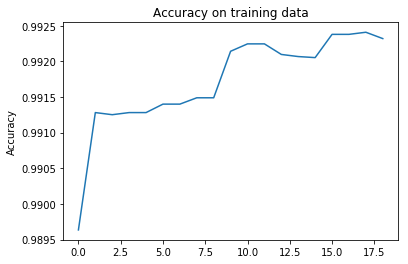

In [11]:
plt.plot(accuracy)
plt.title('Accuracy on training data')
plt.ylabel('Accuracy')

In [12]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    features_sub_test = test_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    score = clf.score(features_sub_test, test_lab)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.9915183867141163
2 0.9924080664294187
3 0.9924080664294187


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.9924080664294187
5 0.9924080664294187


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6 0.992526690391459
7 0.992526690391459


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8 0.9921708185053381


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


9 0.9924673784104389


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10 0.9931791221826809
11 0.9931198102016607


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12 0.9934756820877817


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13 0.9934163701067615


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14 0.9934163701067615


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15 0.9934756820877817


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16 0.993594306049822


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17 0.993594306049822


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 0.993594306049822


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19 0.9932977461447212

19
0.993594306049822


Text(0, 0.5, 'Accuracy')

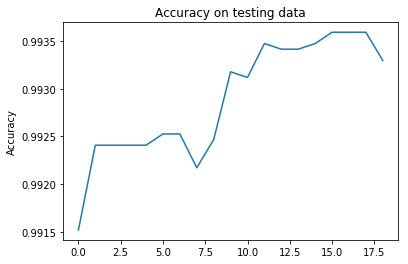

In [13]:
plt.plot(accuracy)
plt.title('Accuracy on testing data')
plt.ylabel('Accuracy')

In [60]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    features_sub_oot = oot_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    score = clf.score(features_sub_oot, oot_lab)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.9852029428783996
2 0.987352236091593
3 0.987352236091593


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.987352236091593
5 0.987352236091593


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6 0.987352236091593
7 0.987352236091593


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8 0.9874349012151773
9 0.987352236091593


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10 0.9874349012151773
11 0.9874349012151773


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12 0.9874349012151773


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13 0.9874349012151773


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14 0.9874349012151773


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15 0.9874349012151773


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16 0.9875175663387616


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17 0.9875175663387616


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 0.9875175663387616


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19 0.9875175663387616

19
0.9875175663387616


Text(0, 0.5, 'Accuracy')

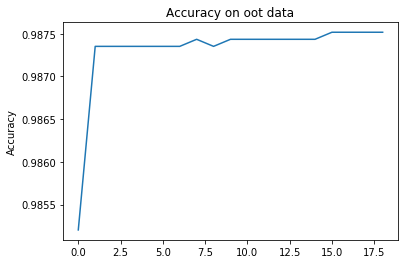

In [61]:
plt.plot(accuracy)
plt.title('Accuracy on oot data')
plt.ylabel('Accuracy')

# Feature Selection based on ROC_AUC

In [14]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    predictions = clf.predict(features_sub)
    score = roc_auc_score(train_lab, predictions)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.547421574556483
2 0.6432457501786608
3 0.6432307587987044


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.6432457501786608
5 0.6432457501786608


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6 0.6433057156984869
7 0.6433057156984869


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8 0.6480666123790809
9 0.6527825349198053
10 0.6760182547623673


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


11 0.677418131032422


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12 0.6780918342525255


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13 0.678016877352743


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14 0.6780018859727863


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15 0.679341796723015


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16 0.6896122502040891


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17 0.6882648437638822


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 0.688953538363942


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19 0.6855400481235552

19
0.6896122502040891


Text(0, 0.5, 'ROC_AUC_Score')

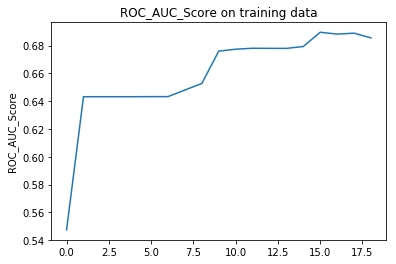

In [15]:
plt.plot(accuracy)
plt.title('ROC_AUC_Score on training data')
plt.ylabel('ROC_AUC_Score')

In [64]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    features_sub_test = test_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    predictions = clf.predict(features_sub_test)
    score = roc_auc_score(test_lab, predictions)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.5374319125464503
2 0.6091702305179318
3 0.6091702305179318


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.6091702305179318
5 0.6091702305179318


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6 0.6092300606004973
7 0.6092300606004973


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8 0.6022610853668732
9 0.6092001455592146


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10 0.6502960359701735
11 0.6536608634218546


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12 0.6708140661343702


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13 0.6707841510930874


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14 0.6707841510930874


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15 0.674208808627334


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16 0.6810581236958271


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17 0.6810581236958271


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 0.6810581236958271


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19 0.6639348360245942

19
0.6810581236958271


Text(0, 0.5, 'ROC_AUC_Score')

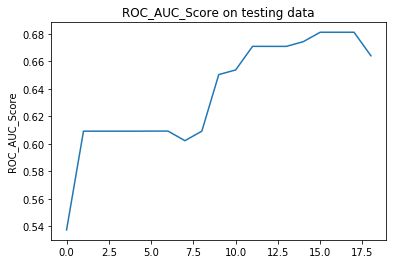

In [65]:
plt.plot(accuracy)
plt.title('ROC_AUC_Score on testing data')
plt.ylabel('ROC_AUC_Score')

In [62]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    features_sub_oot = oot_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    predictions = clf.predict(features_sub_oot)
    score = roc_auc_score(oot_lab, predictions)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.5
2 0.5918850975145805
3 0.5918850975145805


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.5918850975145805
5 0.5918850975145805
6 0.5918850975145805
7 0.5918850975145805


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8 0.5919270508624578
9 0.5973877829975972


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10 0.5919270508624578
11 0.5919270508624578


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12 0.5919270508624578


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13 0.5919270508624578


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14 0.5919270508624578


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15 0.5919270508624578


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16 0.5919690042103348


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17 0.5919690042103348


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 0.5919690042103348


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19 0.5919690042103348

19
0.5973877829975972


Text(0, 0.5, 'ROC_AUC_Score')

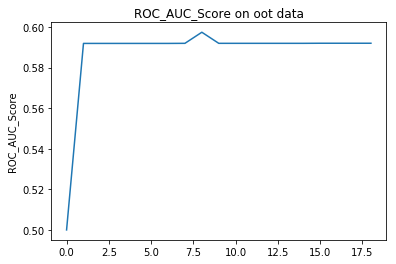

In [63]:
plt.plot(accuracy)
plt.title('ROC_AUC_Score on oot data')
plt.ylabel('ROC_AUC_Score')

Sadly, the accuracy (optimal # of variables = 19) and ROC_AUC_score (optimal # of variables = 9) seem pretty weird on oot data. I didn't figure out whether anything is wrong yet. 

# Feature Selection based on FDR

In [54]:
def multipltrun(a=10,v=18):
    '''
    This function run model on different samples based on user input:
    "a" (int) how many randome samples, default as 5
    "v" (int) how many variables, default as 6 (most important ones from backward selection)
    users can modify model based on different machine learning algorithm and its parameters
    
    FDR is calculated by first sorting outcome in descending order and cut off at 3%,
    sum number of fraud records on top 3% and divided by total fraud racords for that sample
    
    Final output would be a dataframe contains FDR at 3% for training set, testing set, and oot. 
    '''
    #declare dict
    FDRdict={"train":[],"test":[],"oot":[]}
    
    for i in range(a):        
        #split training and testing
        train, test = train_test_split(trte_df, test_size=0.2,random_state=i)
        
        # split lables and features and t
        train_lab = train["Fraud"]
        train_fea = train.iloc[:,1:v+1]

        test_lab = test["Fraud"]
        test_fea = test.iloc[:,1:v+1]

        oot_lab=oot_df["Fraud"]
        oot_fea=oot_df.iloc[:,1:v+1]

        #define and fit model

        clf = LogisticRegression()
        clf.fit(train_fea, train_lab)
    
        #calculate FDR
        for sets in ["train","test","oot"]:
            fea=vars()[sets+'_fea'] 
            lab=vars()[sets+'_lab']
            prob=pd.DataFrame(clf.predict_proba(fea)) #modify based on your model
            result=pd.concat([pd.DataFrame(lab).reset_index(),prob],axis=1)
            topRows=int(round(len(result)*0.03))
            top3per=result.sort_values(by=1,ascending=False).head(topRows)
            FDR=sum(top3per.loc[:,'Fraud'])/sum(result.loc[:,'Fraud'])
            FDRdict[sets].append(FDR)
    
    #convert into dataframe
    FDR_df=pd.DataFrame(FDRdict)
   
    #add new row to calculate mean
    FDR_df.loc['mean']=FDR_df.mean()
    
    return FDR_df

In [26]:
multipltrun()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

,train,test,oot
0,0.662125,0.609589,0.340782
1,0.664286,0.661111,0.402235
2,0.668596,0.650794,0.385475
3,0.655462,0.650602,0.335196
4,0.654596,0.685185,0.385475
5,0.670940,0.606742,0.351955
6,0.665698,0.625000,0.346369
7,0.646974,0.715054,0.335196
8,0.642655,0.709302,0.402235
9,0.671408,0.638418,0.396648


In [55]:
multipltrun(v=19)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

,train,test,oot
0,0.663488,0.602740,0.335196
1,0.665714,0.661111,0.407821
2,0.662808,0.656085,0.379888
3,0.663866,0.638554,0.335196
4,0.658774,0.697531,0.385475
5,0.670940,0.606742,0.351955
6,0.674419,0.619792,0.329609
7,0.648415,0.720430,0.335196
8,0.651130,0.720930,0.385475
9,0.674253,0.649718,0.374302


In [52]:
def multipltrun_2(a=10,v=18):
    '''
    This function run model on different samples based on user input:
    "a" (int) how many randome samples, default as 5
    "v" (int) how many variables, default as 6 (most important ones from backward selection)
    users can modify model based on different machine learning algorithm and its parameters
    
    FDR is calculated by first sorting outcome in descending order and cut off at 3%,
    sum number of fraud records on top 3% and divided by total fraud racords for that sample
    
    Final output would be a dataframe contains FDR at 3% for training set, testing set, and oot. 
    '''
    #declare dict
    FDRdf_v=pd.DataFrame({"train":[],"test":[],"oot":[]})
    
    for j in range(1,v+1):
        FDRdict={"train":[],"test":[],"oot":[]}
        
        for i in range(a):
        #split training and testing
            train, test = train_test_split(trte_df, test_size=0.2,random_state=i)
        
            # split lables and features and t
            train_lab = train["Fraud"]
            train_fea = train.iloc[:,1:j+1]

            test_lab = test["Fraud"]
            test_fea = test.iloc[:,1:j+1]

            oot_lab=oot_df["Fraud"]
            oot_fea=oot_df.iloc[:,1:j+1]

            #define and fit model

            clf = LogisticRegression()
            clf.fit(train_fea, train_lab)

            #calculate FDR
            for sets in ["train","test","oot"]:
                fea=vars()[sets+'_fea'] 
                lab=vars()[sets+'_lab']
                prob=pd.DataFrame(clf.predict_proba(fea)) 
                result=pd.concat([pd.DataFrame(lab).reset_index(),prob],axis=1)
                topRows=int(round(len(result)*0.03))
                top3per=result.sort_values(by=1,ascending=False).head(topRows)
                FDR=sum(top3per.loc[:,'Fraud'])/sum(result.loc[:,'Fraud'])
                FDRdict[sets].append(FDR)
    
    #convert into dataframe
        FDR_df=pd.DataFrame(FDRdict)
   
    #add new row to calculate mean
        # FDRdf_v.append(FDR_df.mean(),ignore_index=True)
    
        FDRdf_v.loc[j+1]=FDR_df.mean()
        
    return FDRdf_v

In [53]:
multipltrun_2()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

,train,test,oot
2,0.393394,0.397770,0.078212
3,0.616231,0.627992,0.245810
4,0.617516,0.629147,0.245810
5,0.618079,0.629184,0.245810
6,0.617943,0.629184,0.245810
7,0.615696,0.622555,0.245810
8,0.614982,0.622555,0.245810
9,0.621501,0.635721,0.288827
10,0.626748,0.637007,0.344134
11,0.631344,0.640766,0.311173


In [56]:
multipltrun_df=multipltrun_2()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

## According to the chart above, the optimal FDR for oot data is 0.375419, corresponding to 13 variables.

Text(0, 0.5, 'FDR')

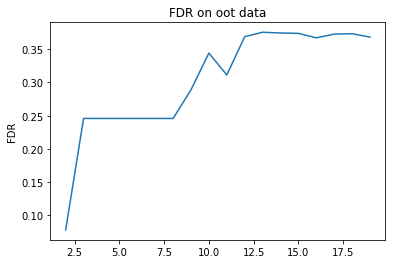

In [57]:
plt.plot(multipltrun_df['oot'])
plt.title('FDR on oot data')
plt.ylabel('FDR')

Conclusion: optimal # of variables is 13, the corresponding FDR is 0.375419.